In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option("display.max_colwidth", None)

In [3]:
df = pd.read_csv('out_final.csv',encoding='utf8')
df.shape

(74284, 4)

In [4]:
df['isShown'].value_counts()

isShown
1.0    47670
0.0    26614
Name: count, dtype: int64

In [5]:
df_exceed = df[df['isShown'] == 1.0]
df_exceed.shape

(47670, 4)

In [ ]:
def filter_high_total(info_str):
    try:
        # Load JSON string into Python list
        info_list = json.loads(info_str)
        # Filter dictionaries where total is greater than 670
        filtered_list = [entry for entry in info_list if entry["total"] > 670]
        return json.dumps(filtered_list)  # Convert back to string to store in DataFrame
    except json.JSONDecodeError:
        return '[]'  # Return empty list if JSON decoding fails

# Apply filtering function to 'info' column
df_exceed['filtered_info'] = df_exceed['info'].apply(filter_high_total)

C:\Users\G6330\AppData\Local\Temp\ipykernel_30944\469450131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exceed['filtered_info'] = df_exceed['info'].apply(filter_high_total)


In [ ]:
df_exceed['filtered_info'].head(3)

2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [{"id": "slide-1", "total": 849.8624877929688, "span": 13.60

In [25]:
def expand_filtered_info(row):
    try:
        info_list = json.loads(row['filtered_info'])  # Parse JSON
        for entry in info_list:
            entry.pop('id', None)
            entry['original_id'] = row['id']  # Keep track of original id
            entry['original_url'] = row['url']  # Keep track of original URL
        return info_list
    except json.JSONDecodeError:
        return []

def expand_info(info):
    try:
        info_list = json.loads(info)  # Parse JSON
        # for entry in info_list:
        #     entry.pop('id', None)
        #     entry['original_id'] = row['id']  # Keep track of original id
        #     entry['original_url'] = row['url']  # Keep track of original URL
        return info_list
    except json.JSONDecodeError:
        return []

# Flatten the data
# expanded_data = df_exceed.apply(expand_filtered_info, axis=1).explode().dropna().reset_index(drop=True)
expanded_data = df_exceed['info'].dropna().apply(expand_info).explode().dropna().reset_index(drop=True)

# Convert list of dictionaries into DataFrame
expanded_df = pd.json_normalize(expanded_data)

# Rename columns for clarity
# expanded_df.rename(columns={'original_id': 'id', 'original_url': 'url'}, inplace=True)

In [26]:
print(expanded_data.shape)
print(df.shape)

(636399,)
(74284, 4)


In [27]:
expanded_df.head(2)

,id,total,span,h2,img,description
0,slide-1,849.862488,13.6,31.200001,566.862488,236.800003
1,slide-2,418.300018,15.0,0.000000,292.500000,108.800003


In [60]:
import math
ids = []
def filter_img_height(row):
    try:
        # Load JSON string into Python list
        info_list = json.loads(row['info'])
        # Filter dictionaries where total is greater than 670
        for entry in info_list:
            img_h = entry["img"]
            if img_h == 251.859375:
                id = row['id']
                if id not in ids:
                    ids.append(id)
    except json.JSONDecodeError:
        print('exception')
df_drop = df.dropna()
df_drop.apply(filter_img_height, axis=1)
print(ids)
print(len(ids))

['375e6f41-d109-4ef3-831c-e82a3a99b4a9', '7a534209-92e6-41ad-b963-453553f7ad72', 'f3f30bad-49ab-402b-a6b9-6054f84018d4', '6b69f043-e809-4cd5-9f50-5cd03144104c', '7f5b48cf-c02b-48c0-bfaa-e21ebfc1caa3', '5ea69a21-057c-48d2-b5b3-86cb62e7dbe0', '7bd52990-2c38-453e-8138-a2ba3c520a79', 'c0d464e7-614b-42c3-bb13-b055e4216290', '2d552fd1-8eda-426d-84ff-ec6a883a9927', '5ba26ac0-027a-410e-9e0f-2b128a0530e4', '5754c927-6172-4daa-8607-fa5f5041c9d9', '4f9b7f62-64ab-45cd-afc7-0a0f51099438', '91b7b12f-b97a-4291-a78d-84d4af049198', '660b12d0-b198-47d1-8fb3-6f7b699e62a0', 'de7951e3-a483-4816-88bc-1fc4f9b6b675', 'fa760515-90c8-4790-b040-df95cd207839', '037f2cd2-a5e8-49c7-94ab-bf9d98101f12', '45b2126d-1ef1-4f69-962b-94afdec82f66', 'f2ffd1d3-b930-4b28-a812-bd60bd7e12c2', '89ca5eaa-18b0-4d83-ba47-f40ba1c6b1fd', '4829db27-061d-476c-acda-482be9754267', '5bee3598-5087-4eca-8455-84e0acfa22bb', '80b4c8cc-d063-412c-8acc-85ddbabbdc4f', 'a073a205-8675-40a4-ad8d-13f502970bbb', '70121591-e53e-4fa9-826b-bccb3ac73c31',

In [45]:
print(len(ids))

74207


In [40]:
unique_span = expanded_df['span'].unique()
print(len(unique_span))
unique_h2 = expanded_df['h2'].unique()
print(len(unique_h2))
unique_img = expanded_df['img'].unique()
print(len(unique_img))
unique_description = expanded_df['description'].unique()
print(len(unique_description))


166
193
23343
8554


In [63]:
df_span = expanded_df['img'].value_counts()
df_span.shape

(31523,)

In [41]:
expanded_height_df = expanded_df[['total','span','h2','img','description']]
expanded_height_df.describe()

,total,span,h2,img,description
count,257005.000000,257005.000000,257005.000000,257005.000000,257005.000000
mean,829.829997,15.368522,37.380443,479.953189,271.443141
std,161.638517,20.512878,23.057334,158.741707,216.492276
min,670.012512,0.000000,0.000000,0.000000,0.000000
25%,721.593750,0.000000,24.000000,393.000000,124.750000
50%,783.875000,13.600000,31.200001,524.125000,227.199997
75%,884.875000,18.000000,48.000000,589.500000,364.800018
max,6103.078125,613.937500,470.399994,2779.859375,5745.625000


In [14]:
expanded_height_df.head(5)

,total,span,h2,img,description
0,849.862488,13.6,31.200001,566.862488,236.800003
1,745.400024,13.6,31.200001,590.400024,108.800003
2,745.400024,13.6,31.200001,590.400024,108.800003
3,821.912537,13.6,31.200001,590.112488,185.600006
4,689.174988,13.6,31.200001,534.174988,108.800003


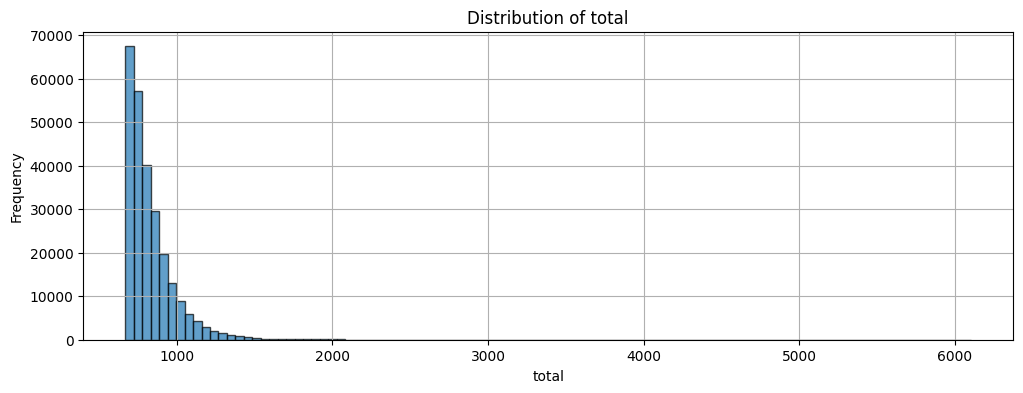

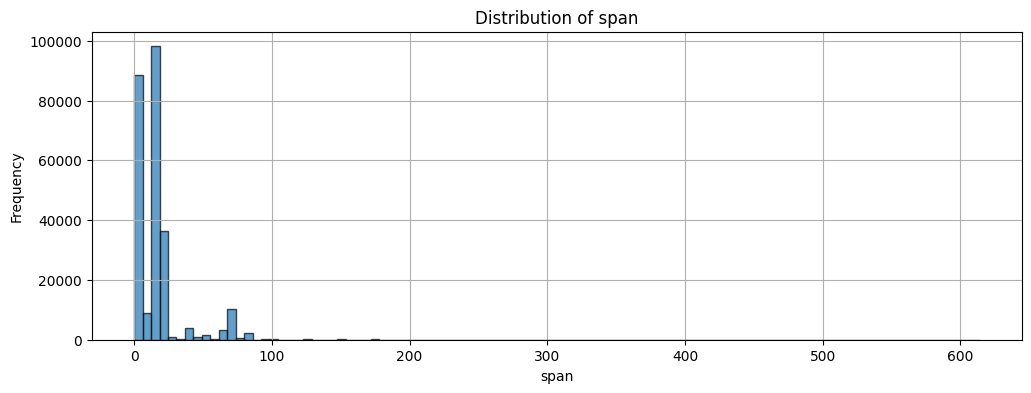

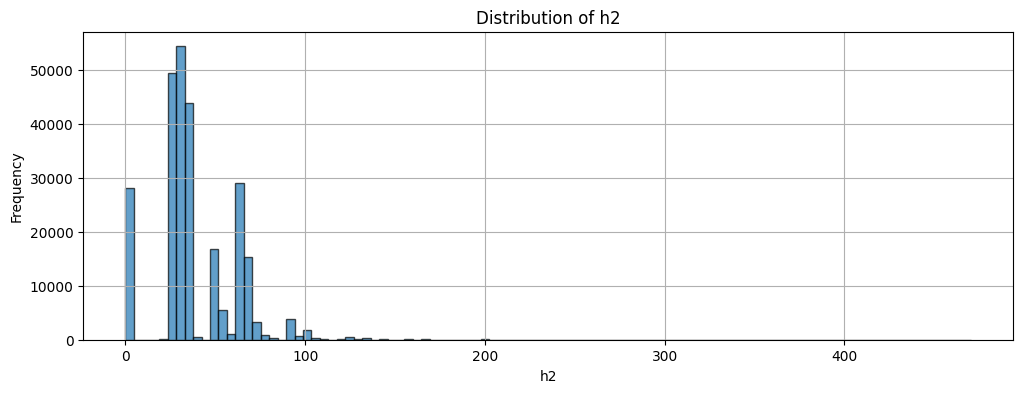

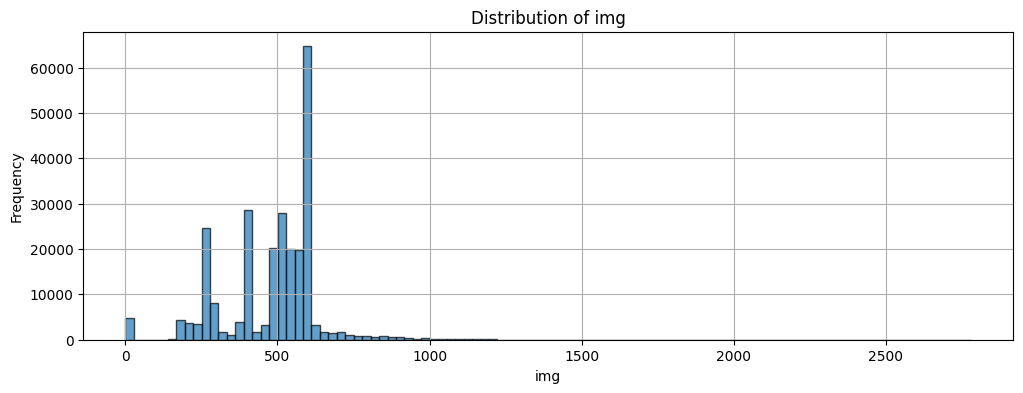

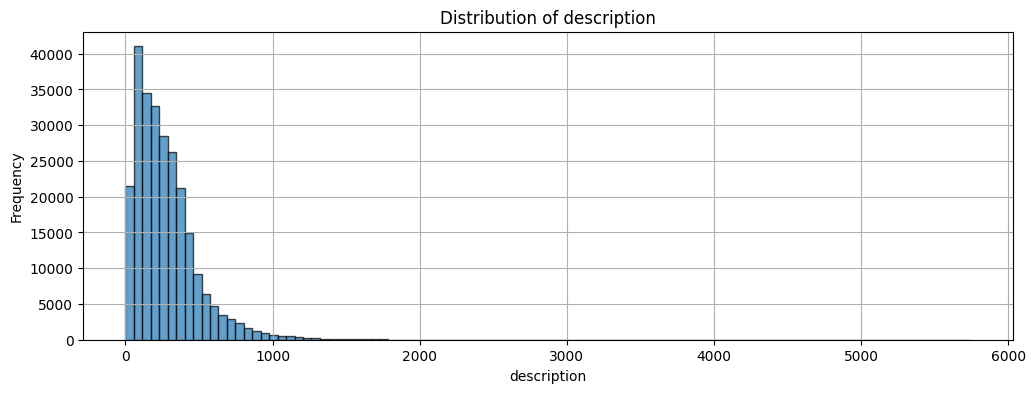

In [45]:
for column in ["total", "span", "h2", "img", "description"]:
    plt.figure(figsize=(12, 4))
    plt.hist(expanded_height_df[column], bins=100, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [46]:
# TODO: analyse by different Media
df_mos = pd.read_csv('mos_ori.csv')
df_mos.shape

(74284, 2)

In [ ]:

url = 'https://www.elle.com/jp/gourmet/gourmet-healthyfood/g42767003/dating-tips-spice-tolerance-23-0403/'
arr = url.split('/')
print(arr)

['https:', '', 'www.elle.com', 'jp', 'gourmet', 'gourmet-healthyfood', 'g42767003', 'dating-tips-spice-tolerance-23-0403', '']


In [48]:
df_mos['url_splits']=df_mos['url'].str.split('/')
df_mos['url_splits'].head(3)

0    [https:, , www.elle.com, jp, gourmet, gourmet-healthyfood, g42767003, dating-tips-spice-tolerance-23-0403, ]
1          [https:, , www.elle.com, jp, gourmet, gourmet-healthyfood, g42766857, worst-foods-for-teeth-23-0313, ]
2            [https:, , www.elle.com, jp, culture, celebgossip, g42766623, kpopidols-songs-for-auditions230223, ]
Name: url_splits, dtype: object

In [51]:
df_mos['domain'] = df_mos['url_splits'].apply(lambda x:x[2] if len(x) > 2 else None)
df_mos['media'] = df_mos['url_splits'].apply(lambda x:x[3] if len(x) > 3 else None)
df_mos['domain'].unique()

array(['www.elle.com', 'www.harpersbazaar.com', 'www.esquire.com',
       'www.ellegirl.jp', 'www.25ans.jp', 'www.fujingaho.jp',
       'www.modernliving.jp', 'www.womenshealthmag.com',
       'www.richessemag.jp'], dtype=object)

In [52]:
df_mos['media'].unique()

array(['jp', 'beauty', 'life-culture', 'celeb', 'fashion', 'wellness',
       'career', 'sports', 'g46580914', 'horoscope', 'lifestyle',
       'wedding', 'society', 'celebrity', 'princess', 'gourmet',
       'culture', 'architecture-design', 'products', 'travel',
       'house-interior', 'green-garden', 'fujingaho-shop', 'fortune',
       'mlstyling', 'lovegreen', 'g61633870', 'essay', 'uts-kimono',
       'fashion-beauty', 'egpr', 'richesse', 'about'], dtype=object)

In [53]:
df_exceed.shape

(47670, 5)

In [66]:
df_elle = df_exceed[df_exceed['url'].str.contains('www.elle.com')]
# df_elle.to_csv('elle.csv',index=False)
print(df_elle.shape)
print(df_mos[df_mos['url'].str.contains('www.elle.com')].shape)

(21850, 5)
(34241, 5)


In [ ]:
# ['www.elle.com', 'www.harpersbazaar.com', 'www.esquire.com',
#        'www.ellegirl.jp', 'www.25ans.jp', 'www.fujingaho.jp',
#        'www.modernliving.jp', 'www.womenshealthmag.com',
#        'www.richessemag.jp']
df_harpersbazaar = df_exceed[df_exceed['url'].str.contains('www.harpersbazaar.com')]
# df_harpersbazaar.to_csv('harpersbazaar.csv',index=False)
print(df_harpersbazaar.shape)
print(df_mos[df_mos['url'].str.contains('www.harpersbazaar.com')].shape)

(5336, 5)
(6950, 5)


In [68]:
df_esquire = df_exceed[df_exceed['url'].str.contains('www.esquire.com')]
# df_esquire.to_csv('esquire.csv',index=False)
print(df_esquire.shape)
print(df_mos[df_mos['url'].str.contains('www.esquire.com')].shape)

(2844, 5)
(4083, 5)


In [70]:
df_ellegirl = df_exceed[df_exceed['url'].str.contains('www.ellegirl.jp')]
# df_ellegirl.to_csv('ellegirl.csv',index=False)
print(df_ellegirl.shape)
print(df_mos[df_mos['url'].str.contains('www.ellegirl.jp')].shape)

(3773, 5)
(6376, 5)


In [71]:
df_25ans = df_exceed[df_exceed['url'].str.contains('www.25ans.jp')]
# df_25ans.to_csv('25ans.csv',index=False)
print(df_25ans.shape)
print(df_mos[df_mos['url'].str.contains('www.25ans.jp')].shape)

(7520, 5)
(11951, 5)


In [72]:
df_fujingaho = df_exceed[df_exceed['url'].str.contains('www.fujingaho.jp')]
# df_fujingaho.to_csv('fujingaho.csv',index=False)
print(df_fujingaho.shape)
print(df_mos[df_mos['url'].str.contains('www.fujingaho.jp')].shape)

(2213, 5)
(3848, 5)


In [73]:
df_modernliving = df_exceed[df_exceed['url'].str.contains('www.modernliving.jp')]
# df_modernliving.to_csv('modernliving.csv',index=False)
print(df_modernliving.shape)
print(df_mos[df_mos['url'].str.contains('www.modernliving.jp')].shape)

(1020, 5)
(1345, 5)


In [74]:
df_womenshealthmag = df_exceed[df_exceed['url'].str.contains('www.womenshealthmag.com')]
# df_womenshealthmag.to_csv('womenshealthmag.csv',index=False)
print(df_womenshealthmag.shape)
print(df_mos[df_mos['url'].str.contains('www.womenshealthmag.com')].shape)

(3098, 5)
(5466, 5)


In [75]:
df_richessemag = df_exceed[df_exceed['url'].str.contains('www.richessemag.jp')]
# df_richessemag.to_csv('richessemag.csv',index=False)
print(df_richessemag.shape)
print(df_mos[df_mos['url'].str.contains('www.richessemag.jp')].shape)

(16, 5)
(24, 5)
